# Introduzione alle reti neurali con Python

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import pandas as pd

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

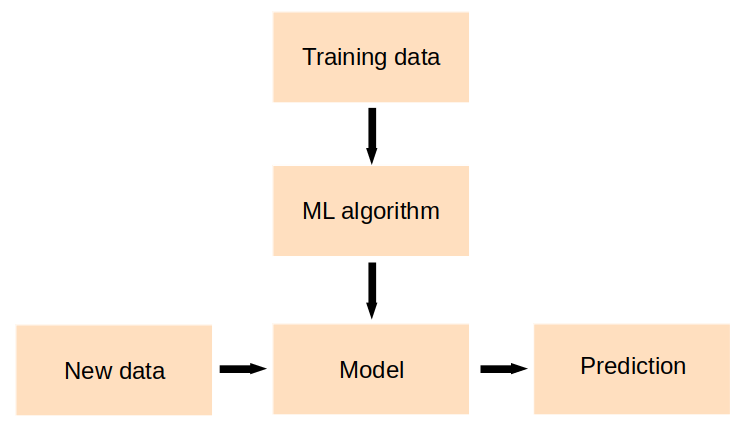

<IPython.core.display.Javascript object>

In [4]:
Image("ML-Data paradigm.png")

In [5]:
df = pd.read_table(
    "iris.data",
    sep=",",
    header=None,
    names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"],
)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<IPython.core.display.Javascript object>

In [6]:
mask = df["class"] == "Iris-setosa"

<IPython.core.display.Javascript object>

In [7]:
df.loc[mask, "class"] = 1
df.loc[~mask, "class"] = 0

<IPython.core.display.Javascript object>

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<IPython.core.display.Javascript object>

In [9]:
y, X = df["class"].values, df.drop(columns="class").values

<IPython.core.display.Javascript object>

## Il modello di Regressione lineare

### E' possibile esprimere la relazione tra le variabili come la somma ponderata delle variabili indipendenti.

Quindi, ogni variabile indipendente sarà moltiplicata *(dot product)* per un vettore chiamato "pesi" e sucessivamente sarà sommato con un altro vettore chiamato "bias".

<!-- Modeling the relationship between the variables as linear, you can express the dependent variable as a weighted sum of the independent variables.

So, each independent variable will be multiplied by a vector called weight. Besides the weights and the independent variables, you also add another vector: the bias. It sets the result when all the other independent variables are equal to zero. -->

#### Esempio dot product

In [10]:
input_vector = X[0, :2]
input_vector

array([5.1, 3.5])

<IPython.core.display.Javascript object>

In [11]:
weights_1 = [1.26, 0]

<IPython.core.display.Javascript object>

In [12]:
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]

dot_product_1 = first_indexes_mult + second_indexes_mult

dot_product_1

6.425999999999999

<IPython.core.display.Javascript object>

In [13]:
5.1 * 1.26 + 3.5 * 0

6.425999999999999

<IPython.core.display.Javascript object>

In [14]:
dot_product_1 = np.dot(input_vector, weights_1)

dot_product_1

6.425999999999999

<IPython.core.display.Javascript object>

#### Al dot product aggiungeremo il bias e poi una funzione di attivazione

In [15]:
bias = np.array([0.0])

<IPython.core.display.Javascript object>

In [16]:
# funzione di attivazione
def sigmoid(x):

    return 1 / (1 + np.exp(-x))

<IPython.core.display.Javascript object>

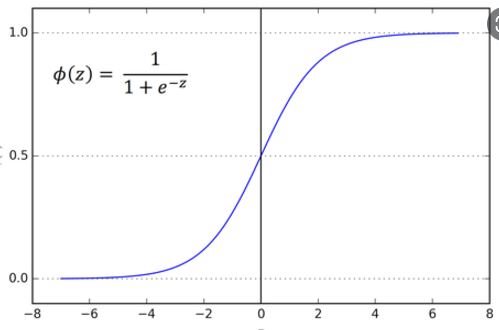

<IPython.core.display.Javascript object>

In [17]:
Image("Sigmoid Function.png")

In [18]:
def make_prediction(input_vector, weights, bias):

    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)

    return layer_2

<IPython.core.display.Javascript object>

In [19]:
prediction = make_prediction(input_vector, weights_1, bias)

prediction

array([0.9983837])

<IPython.core.display.Javascript object>

In [20]:
y[0]

1

<IPython.core.display.Javascript object>

In [21]:
input_vector = X[149, :2]
input_vector

array([5.9, 3. ])

<IPython.core.display.Javascript object>

In [22]:
prediction = make_prediction(input_vector, weights_1, bias)

prediction

array([0.99940953])

<IPython.core.display.Javascript object>

In [23]:
y[149]

0

<IPython.core.display.Javascript object>

## Anatomia di una rete neurale

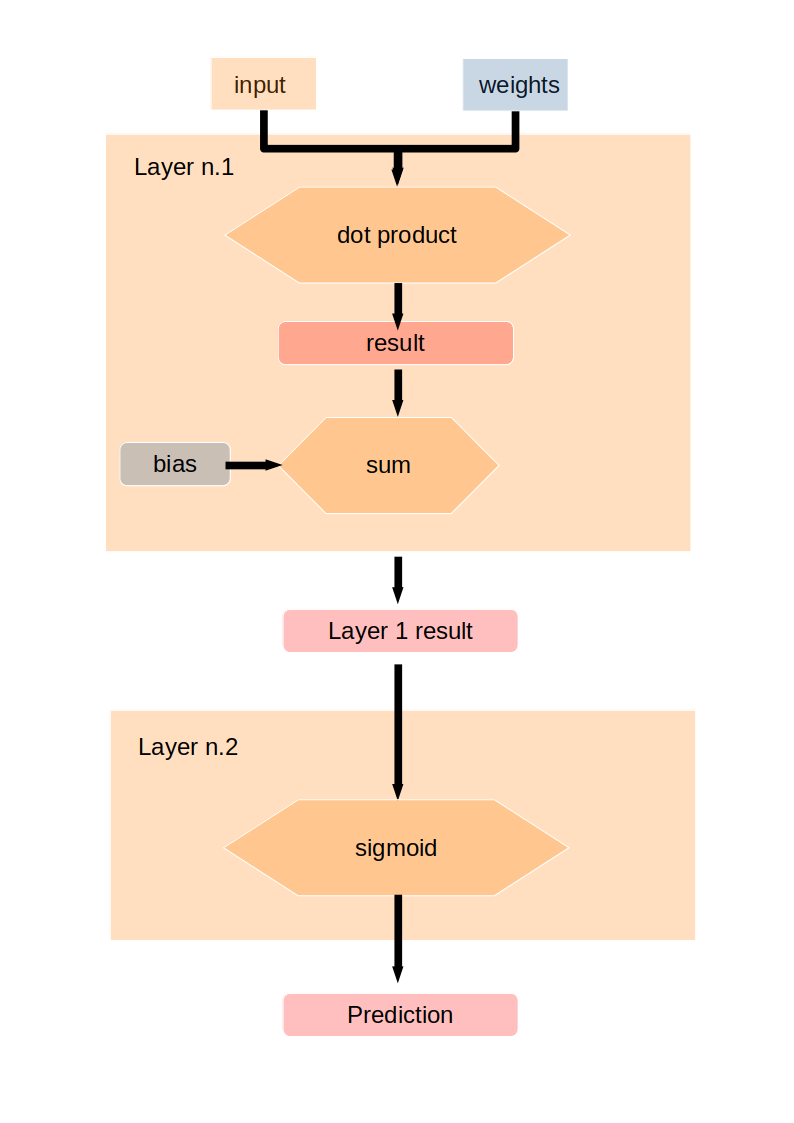

<IPython.core.display.Javascript object>

In [24]:
Image("Anatomia NNet.png")

### Ogni layer applica una trasformazione dei dati.

## Aggiustare l'errore attraverso il gradient descent and backpropagation algorithms

Dal confronto tra valore previsto e valore reale è possibile misurare quanto l'algoritmo sta sbagliando.

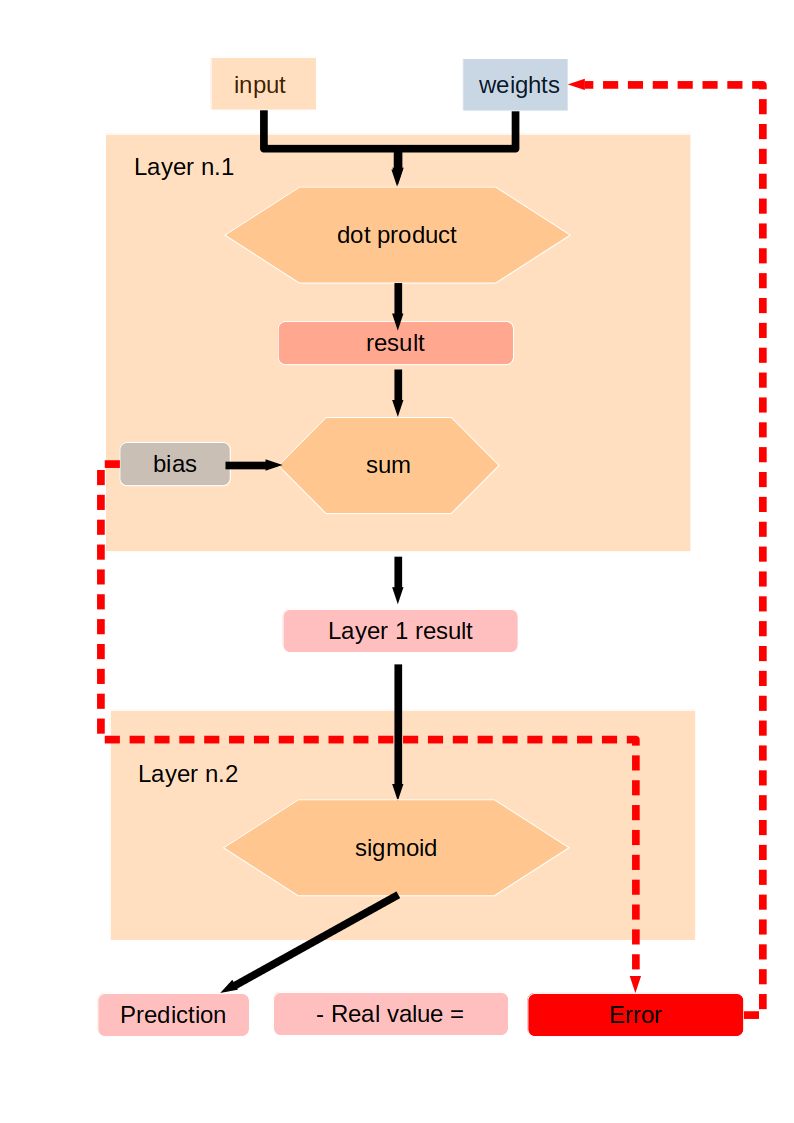

<IPython.core.display.Javascript object>

In [25]:
Image("Backpropagation.png")

#### L'obiettivo è quello di cambiare pesi e bias per diminuire l'errore.

Per questo entrano in gioco le derivate.

Nello studio di funzione, le derivate indicano il punto minimo di una funzione.

#### Attraverso le derivate (gradient) è possibile capire in quale direzione andare per ridurre l'errore.

In [26]:
target = 0

# Funzione di loss
mse = np.square(prediction - target)

mse

array([0.99881941])

<IPython.core.display.Javascript object>

#### In questo caso la derivata è: 2 * x

In [27]:
derivative = 2 * (prediction - target)
derivative

array([1.99881906])

<IPython.core.display.Javascript object>

#### Se il risultato è positivo allora bisogna ridurre i pesi (e anche il bias)

In realtà si usano le derivate parziali, ma lo vediamo meglio in seguito.

In [28]:
weights_1 = weights_1 - derivative

<IPython.core.display.Javascript object>

In [29]:
prediction = make_prediction(input_vector, weights_1, bias)

<IPython.core.display.Javascript object>

In [30]:
error = (prediction - target) ** 2
print(f"{error[0]}")

1.0122979630682682e-09


<IPython.core.display.Javascript object>

## Il learning rate (tasso di apprendimento)

Attraverso questo parametro definiamo "quanto" i pesi devono aggiornarsi. Siccome stiamo cercando il minimo di una funzione (immaginiamo una parabola) vogliamo che il nostro errore diminuisca in modo costante verso il minimo.
Con un learning rate uguale al 100% il nostro errore comincerebbe a rimbalzare da un lato all'latro della parabola e questo non è il percorso ottimale.

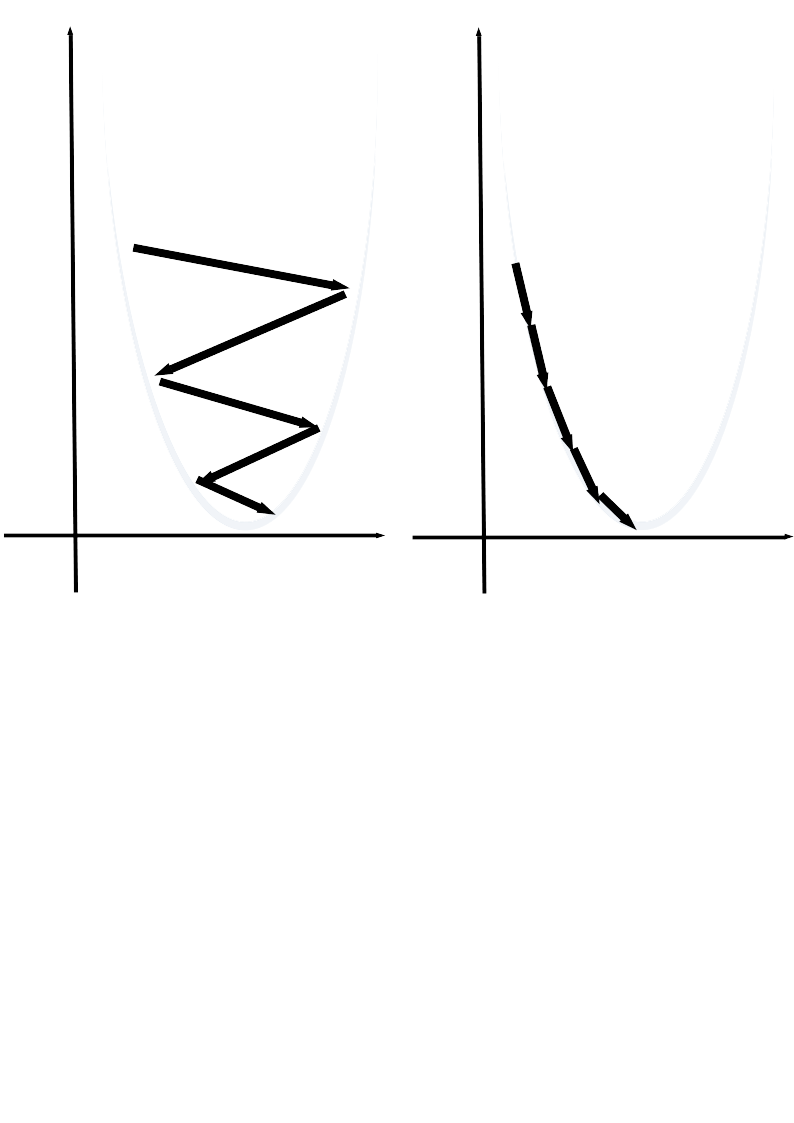

<IPython.core.display.Javascript object>

In [31]:
Image("SGD_1.png")

<!-- In your neural network, you need to update both the weights and the bias vectors. -->

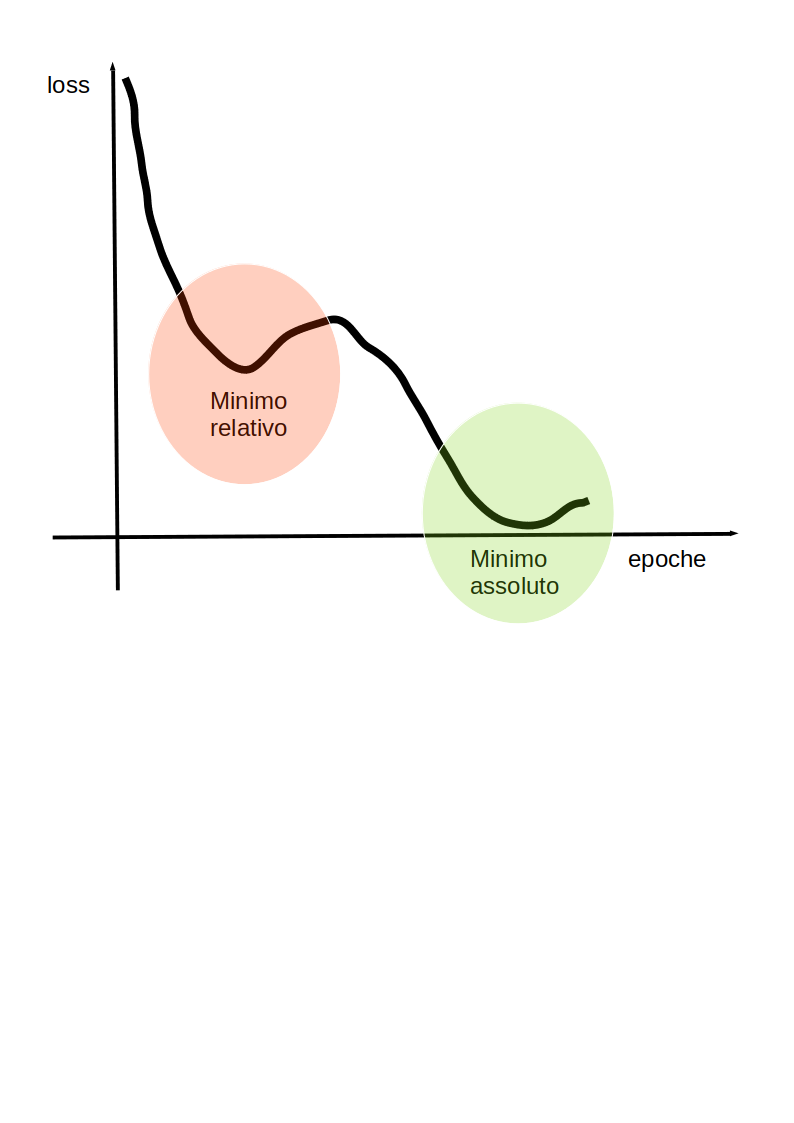

<IPython.core.display.Javascript object>

In [32]:
Image("SGD_2.png")

In [33]:
class NeuralNetwork:
    def __init__(self, input_vectors, targets, learning_rate):
        self.weights = np.array(
            [np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn()]
        )
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

        self.input_vectors = input_vectors
        self.targets = targets

        self.error = 0

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        derror_dweights = derror_dprediction * dprediction_dlayer1 * dlayer1_dweights

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (derror_dweights * self.learning_rate)

    # Scelta di __next__ al posto del classico train
    # per necessità espositive

    def __next__(self):

        random_data_index = np.random.randint(len(self.input_vectors))

        input_vector = self.input_vectors[random_data_index]

        target = self.targets[random_data_index]

        derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)

        self._update_parameters(derror_dbias, derror_dweights)

        prediction = self.predict(input_vector)

        self.error = np.square(prediction - target)

        return self.error

<IPython.core.display.Javascript object>

In [34]:
nnet = NeuralNetwork(X, y, 0.001)

<IPython.core.display.Javascript object>

In [35]:
for i in range(10000):
    next(nnet)

<IPython.core.display.Javascript object>

In [36]:
nnet.error

0.012550321538507526

<IPython.core.display.Javascript object>

## TensorFlow e Keras

### Installazione

In [37]:
# !pip install tensorflow

<IPython.core.display.Javascript object>

In [38]:
from tensorflow import keras

from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [39]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [40]:
scaler = StandardScaler()

<IPython.core.display.Javascript object>

In [41]:
X = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [42]:
y = to_categorical(y)

<IPython.core.display.Javascript object>

In [43]:
model = Sequential()
model.add(Dense(units=16, activation="linear", input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [45]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [49]:
model.fit(x=X, y=y, epochs=100, batch_size=25, validation_split=0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 8ms/step - loss: 0.7267 - accuracy: 0.4792 - val_loss: 0.7604 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 579us/step - loss: 0.7067 - accuracy: 0.4750 - val_loss: 0.7230 - val_accuracy: 0.4167
Epoch 3/100
120/120 [==============================] - 0s 666us/step - loss: 0.6446 - accuracy: 0.5625 - val_loss: 0.6867 - val_accuracy: 0.4500
Epoch 4/100
120/120 [==============================] - 0s 647us/step - loss: 0.6472 - accuracy: 0.5417 - val_loss: 0.6518 - val_accuracy: 0.5500
Epoch 5/100
120/120 [==============================] - 0s 407us/step - loss: 0.6263 - accuracy: 0.5667 - val_loss: 0.6171 - val_accuracy: 0.6000
Epoch 6/100
120/120 [==============================] - 0s 534us/step - loss: 0.5864 - accuracy: 0.6500 - val_loss: 0.5843 - val_accuracy: 0.6333
Epoch 7/100
120/120 [==============================] - 0s 543us/step - loss: 0.5416 - a

Epoch 57/100
120/120 [==============================] - 0s 409us/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 376us/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 356us/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 261us/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 313us/step - loss: 0.0634 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 255us/step - loss: 0.0616 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 282us/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.0200 -

<IPython.core.display.Javascript object>

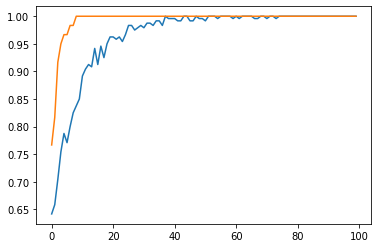

<IPython.core.display.Javascript object>

In [71]:
from matplotlib import pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.show()

In [46]:
X.shape

(150, 4)

<IPython.core.display.Javascript object>

In [47]:
X[0].shape

(4,)

<IPython.core.display.Javascript object>

In [48]:
X[0].reshape(1, 4).shape

(1, 4)

<IPython.core.display.Javascript object>

In [49]:
model.predict(X[10].reshape(1, 4))

array([[4.1094489e-04, 9.9629647e-01]], dtype=float32)

<IPython.core.display.Javascript object>

In [50]:
model.predict_classes(X[10].reshape(1, 4))

array([1])

<IPython.core.display.Javascript object>